In [1]:
### Importing packages for data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

df_small = pd.read_csv("small_data.csv")
df_big = pd.read_csv("big_data.csv")

df_small = df_small.drop(columns=['Unnamed: 0'])
df_big = df_big.drop(columns=['Unnamed: 0'])

In [2]:
df_small.head()

INJURY_BAD  HELMET_USED     age_bins SAFE_PEDAL_ACTION  \
0         0.0          0.0  Middle-aged           Neutral   
1         0.0          0.0        Adult           Neutral   
2         0.0          0.0  Middle-aged              Safe   
3         0.0          0.0  Middle-aged           Neutral   
4         0.0          0.0        Adult              Safe   

   PROTECTIVE_CLOTHING  SAFE_LOCATION      WEATHER_CAT road_surf_bins  \
0                  0.0            1.0    Clear Weather            Dry   
1                  0.0            0.0    Clear Weather            Dry   
2                  0.0            0.0  Adverse Weather           Snow   
3                  0.0            0.0    Clear Weather            Dry   
4                  0.0            0.0  Adverse Weather            Wet   

   DAYTIME   SPEED_RATING  DRIVER_BLIND cause_bins driver_maneuver_bins  \
0        1  Average Speed           0.0      Skill     Turning Maneuver   
1        1  Average Speed           0.0      Skill     Turning Maneuver   
2        0  Average Speed           0.0      Skill       Straight Ahead   
3        1  Average Speed           0.0   Reckless     Traffic Maneuver   
4        0  Average Speed           0.0      Skill     Turning Maneuver   

  physical_bins  hour_bins SEX  
0        Normal  Afternoon   F  
1        Normal    Morning   M  
2      Impaired  Afternoon   M  
3        Normal    Morning   M  
4        Normal      Night   M

In [3]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124 entries, 0 to 2123
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   INJURY_BAD            2124 non-null   float64
 1   HELMET_USED           2124 non-null   float64
 2   age_bins              2124 non-null   object 
 3   SAFE_PEDAL_ACTION     2124 non-null   object 
 4   PROTECTIVE_CLOTHING   2124 non-null   float64
 5   SAFE_LOCATION         2124 non-null   float64
 6   WEATHER_CAT           2124 non-null   object 
 7   road_surf_bins        2124 non-null   object 
 8   DAYTIME               2124 non-null   int64  
 9   SPEED_RATING          2124 non-null   object 
 10  DRIVER_BLIND          2124 non-null   float64
 11  cause_bins            2124 non-null   object 
 12  driver_maneuver_bins  2124 non-null   object 
 13  physical_bins         2124 non-null   object 
 14  hour_bins             2124 non-null   object 
 15  SEX                  

In [4]:
df_big.head()

INJURY_BAD  HELMET_USED     age_bins SAFE_PEDAL_ACTION  \
0         0.0          0.0  Middle-aged           Neutral   
1         0.0          0.0        Adult           Neutral   
2         0.0          0.0        Adult           Neutral   
3         0.0          0.0        Adult              Safe   
4         0.0          0.0      Elderly              Safe   

   PROTECTIVE_CLOTHING  SAFE_LOCATION    WEATHER_CAT road_surf_bins  DAYTIME  \
0                  0.0            1.0  Clear Weather            Dry        1   
1                  0.0            0.0  Clear Weather            Dry        1   
2                  0.0            0.0  Clear Weather            Dry        1   
3                  0.0            0.0  Clear Weather            Dry        1   
4                  1.0            0.0  Clear Weather            Dry        1   

    SPEED_RATING physical_bins  hour_bins SEX  
0  Average Speed        Normal  Afternoon   F  
1  Average Speed        Normal    Morning   M  
2  Average Speed         Other  Afternoon   M  
3  Average Speed        Normal  Afternoon   F  
4  Average Speed         Other  Afternoon   M

In [5]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INJURY_BAD           6807 non-null   float64
 1   HELMET_USED          6807 non-null   float64
 2   age_bins             6807 non-null   object 
 3   SAFE_PEDAL_ACTION    6807 non-null   object 
 4   PROTECTIVE_CLOTHING  6807 non-null   float64
 5   SAFE_LOCATION        6807 non-null   float64
 6   WEATHER_CAT          6807 non-null   object 
 7   road_surf_bins       6807 non-null   object 
 8   DAYTIME              6807 non-null   int64  
 9   SPEED_RATING         6807 non-null   object 
 10  physical_bins        6807 non-null   object 
 11  hour_bins            6807 non-null   object 
 12  SEX                  6807 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 691.5+ KB


In [6]:
df_big_dummy = pd.get_dummies(df_big)
df_big_dummy.head()

INJURY_BAD  HELMET_USED  PROTECTIVE_CLOTHING  SAFE_LOCATION  DAYTIME  \
0         0.0          0.0                  0.0            1.0        1   
1         0.0          0.0                  0.0            0.0        1   
2         0.0          0.0                  0.0            0.0        1   
3         0.0          0.0                  0.0            0.0        1   
4         0.0          0.0                  1.0            0.0        1   

   age_bins_Adolescent  age_bins_Adult  age_bins_Elderly  \
0                    0               0                 0   
1                    0               1                 0   
2                    0               1                 0   
3                    0               1                 0   
4                    0               0                 1   

   age_bins_Middle-aged  SAFE_PEDAL_ACTION_Neutral  ...  physical_bins_Normal  \
0                     1                          1  ...                     1   
1                     0                          1  ...                     1   
2                     0                          1  ...                     0   
3                     0                          0  ...                     1   
4                     0                          0  ...                     0   

   physical_bins_Other  physical_bins_Shaken  hour_bins_Afternoon  \
0                    0                     0                    1   
1                    0                     0                    0   
2                    1                     0                    1   
3                    0                     0                    1   
4                    1                     0                    1   

   hour_bins_Early Morning  hour_bins_Morning  hour_bins_Night  SEX_F  SEX_M  \
0                        0                  0                0      1      0   
1                        0                  1                0      0      1   
2                        0                  0                0      0      1   
3                        0                  0                0      1      0   
4                        0                  0                0      0      1   

   SEX_X  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 32 columns]

In [7]:
df_small_dummy = pd.get_dummies(df_small)
df_small_dummy.head()

INJURY_BAD  HELMET_USED  PROTECTIVE_CLOTHING  SAFE_LOCATION  DAYTIME  \
0         0.0          0.0                  0.0            1.0        1   
1         0.0          0.0                  0.0            0.0        1   
2         0.0          0.0                  0.0            0.0        0   
3         0.0          0.0                  0.0            0.0        1   
4         0.0          0.0                  0.0            0.0        0   

   DRIVER_BLIND  age_bins_Adolescent  age_bins_Adult  age_bins_Elderly  \
0           0.0                    0               0                 0   
1           0.0                    0               1                 0   
2           0.0                    0               0                 0   
3           0.0                    0               0                 0   
4           0.0                    0               1                 0   

   age_bins_Middle-aged  ...  physical_bins_Normal  physical_bins_Other  \
0                     1  ...                     1                    0   
1                     0  ...                     1                    0   
2                     1  ...                     0                    0   
3                     1  ...                     1                    0   
4                     0  ...                     1                    0   

   physical_bins_Shaken  hour_bins_Afternoon  hour_bins_Early Morning  \
0                     0                    1                        0   
1                     0                    0                        0   
2                     0                    1                        0   
3                     0                    0                        0   
4                     0                    0                        0   

   hour_bins_Morning  hour_bins_Night  SEX_F  SEX_M  SEX_X  
0                  0                0      1      0      0  
1                  1                0      0      1      0  
2                  0                0      0      1      0  
3                  1                0      0      1      0  
4                  0                1      0      1      0  

[5 rows x 42 columns]

Run simple imputer

FSM(Non-parametric) with Decision Tree(max depth of 2)

Next model, add more vars tree(Random Forests)

Preprocessing, Train_test_split & standard scalar & OHE 

Log Reg Model(untuned) % interpret coeff/pvalues

Log Reg Model(tuning hyperparameters) using gridsearch pipeline

Log Reg Model in imblearn

# DF_SMALL

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

y = df_small_dummy['INJURY_BAD']
X = df_small_dummy.drop('INJURY_BAD',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=312)



In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
logreg_baseline = LogisticRegression()
logreg_baseline.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = logreg_baseline.predict(X_test)
accuracy = logreg_baseline.score(X_test, y_test)

print('Accuracy:', accuracy)

Accuracy: 0.8917647058823529


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       379
         1.0       0.00      0.00      0.00        46

    accuracy                           0.89       425
   macro avg       0.45      0.50      0.47       425
weighted avg       0.80      0.89      0.84       425



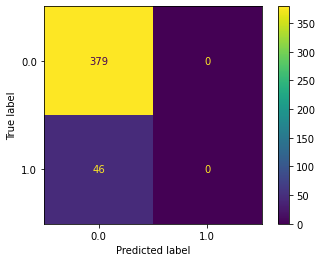

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = logreg_baseline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=logreg_baseline.classes_)
cmd.plot()

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# create an instance of the DecisionTreeClassifier class with the max_depth parameter set to 2
dtc = DecisionTreeClassifier(max_depth=3)

# fit the classifier to the data
dtc.fit(X_train, y_train)

# predict on the test data
y_pred = dtc.predict(X_test)

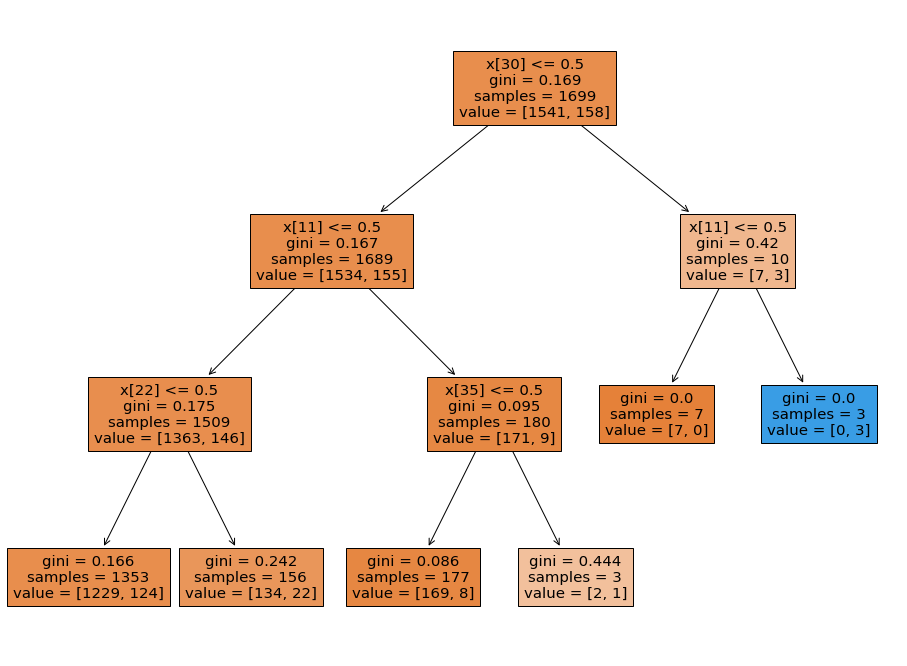

In [15]:
plt.figure(figsize=(16, 12))
plot_tree(dtc, filled=True)
plt.show()

# DF_BIG

In [16]:
y = df_big_dummy['INJURY_BAD']
X = df_big_dummy.drop('INJURY_BAD',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=312)

In [17]:
logreg_baseline = LogisticRegression()
logreg_baseline.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = logreg_baseline.predict(X_test)
y_prob = logreg_baseline.predict_proba(X_test)[:,1]

accuracy = logreg_baseline.score(X_test, y_test)

print('Accuracy:', accuracy)

Accuracy: 0.8972099853157122


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1222
         1.0       0.00      0.00      0.00       140

    accuracy                           0.90      1362
   macro avg       0.45      0.50      0.47      1362
weighted avg       0.80      0.90      0.85      1362



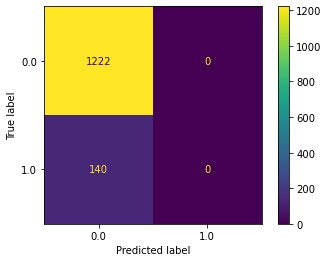

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = logreg_baseline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=logreg_baseline.classes_)
cmd.plot()

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree

#imputer = SimpleImputer(strategy='mean')
#
#imputer.fit(X)
#X_imputed = imputer.transform(X)

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

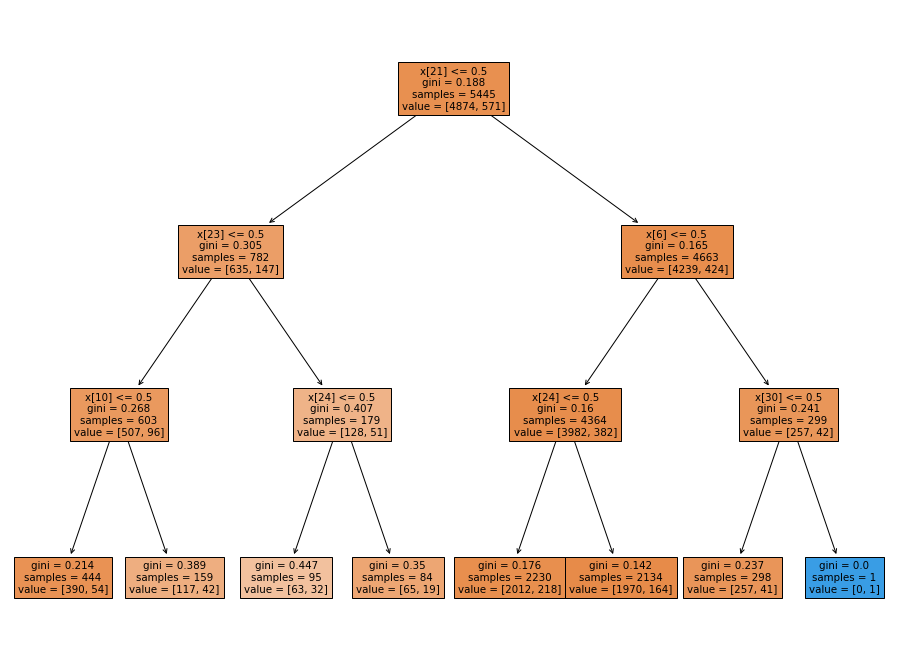

In [22]:
plt.figure(figsize=(16, 12))
plot_tree(dtc, filled=True)
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier

# create an instance of the RandomForestClassifier class with the n_estimators parameter set to 100
rfc = RandomForestClassifier(n_estimators=100)

# fit the classifier to the data
rfc.fit(X_train, y_train)

# predict on the test data
y_pred = rfc.predict(X_test)

accuracy = rfc.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8839941262848752


## SMOTE/ OHE 

In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

In [25]:
y = df_big['INJURY_BAD']
X = df_big.drop('INJURY_BAD',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=312)

In [26]:
# One-hot encode 
ohe = OneHotEncoder()
encoder = ohe.fit(X_train)
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

# SMOTE the training!
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train)

# Scale it!
scaler = StandardScaler(with_mean=False)
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Scale the testing set using the same StandardScaler object
X_test_scaled = scaler.transform(X_test_encoded)

In [27]:
dtc = DecisionTreeClassifier(random_state=312,max_depth=3)
dtc.fit(X_resampled_scaled,y_resampled)

DecisionTreeClassifier(max_depth=3, random_state=312)

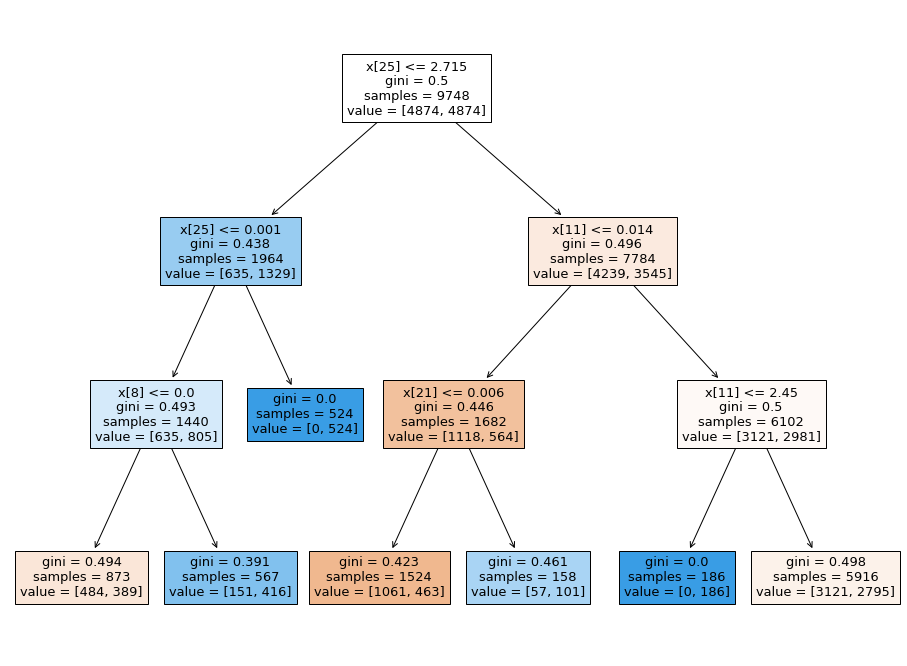

In [28]:
plt.figure(figsize=(16, 12))
plot_tree(dtc, filled=True)
plt.show()


In [29]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest 
rfc = RandomForestClassifier(max_depth=5,n_estimators=100)
rfc.fit(X_resampled_scaled, y_resampled)

# Predict test data
y_pred = rfc.predict(X_test_scaled)

accuracy = rfc.score(X_test_scaled, y_test)
print('Accuracy:', accuracy)

#max depth and num estimators to give highest recall or something

Accuracy: 0.7878120411160059


In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# Create a grid search object
logreg_baseline = LogisticRegression(random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(logreg_baseline, param_grid, cv=5)
grid_search.fit(X_resampled_scaled, y_resampled)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'C': 0.1}
Best score: 0.5814517372485561


In [32]:
# Create a grid search object
logreg_baseline = LogisticRegression(random_state=312,solver='liblinear')

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l2']}
            #'solver': ['newton-cg']
#}

grid_search = GridSearchCV(logreg_baseline, param_grid, cv=5)
grid_search.fit(X_resampled_scaled, y_resampled)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 0.5814517372485561


### Important Features Sorted

In [33]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
logreg = LogisticRegression(random_state=312)

grid_search = GridSearchCV(logreg_baseline, param_grid, cv=5)
grid_search.fit(X_resampled_scaled, y_resampled)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a new Logistic Regression model with the best hyperparameters
logreg_best = LogisticRegression(random_state=312, **best_params)
logreg_best.fit(X_resampled_scaled, y_resampled)

# Obtain predictions on the test set
y_pred = logreg_best.predict(X_resampled_scaled)

# Generate a classification report for the predictions
print(classification_report(y_resampled, y_pred))

              precision    recall  f1-score   support

         0.0       0.58      0.59      0.59      4874
         1.0       0.59      0.58      0.58      4874

    accuracy                           0.58      9748
   macro avg       0.58      0.58      0.58      9748
weighted avg       0.58      0.58      0.58      9748



In [34]:
from imblearn.under_sampling import RandomUnderSampler

und = RandomUnderSampler(random_state=312)
X_und, y_und = und.fit_resample(X_train_encoded,y_train)

In [35]:
dtc = DecisionTreeClassifier(max_depth=2,random_state=312)
dtc.fit(X_und, y_und)

DecisionTreeClassifier(max_depth=2, random_state=312)

In [36]:
importances = list(dtc.feature_importances_)

In [37]:
X_und_df = pd.DataFrame(X_und.todense(),columns=ohe.get_feature_names_out())

In [38]:
names = list(X_und_df.columns)

In [39]:
importance_names = dict(zip(names,importances))

In [41]:
importance_names

{'HELMET_USED_0.0': 0.0,
 'HELMET_USED_1.0': 0.0,
 'age_bins_Adolescent': 0.0,
 'age_bins_Adult': 0.0,
 'age_bins_Elderly': 0.0,
 'age_bins_Middle-aged': 0.0,
 'SAFE_PEDAL_ACTION_Neutral': 0.0,
 'SAFE_PEDAL_ACTION_Safe': 0.0,
 'SAFE_PEDAL_ACTION_Unsafe': 0.0,
 'PROTECTIVE_CLOTHING_0.0': 0.0,
 'PROTECTIVE_CLOTHING_1.0': 0.0,
 'SAFE_LOCATION_0.0': 0.0,
 'SAFE_LOCATION_1.0': 0.0,
 'WEATHER_CAT_Adverse Weather': 0.0,
 'WEATHER_CAT_Clear Weather': 0.0,
 'road_surf_bins_Dry': 0.0,
 'road_surf_bins_Other': 0.0,
 'road_surf_bins_Snow': 0.0,
 'road_surf_bins_Wet': 0.0,
 'DAYTIME_0': 0.0,
 'DAYTIME_1': 0.0,
 'SPEED_RATING_Above Average Speed': 0.20089297151036875,
 'SPEED_RATING_Average Speed': 0.0,
 'SPEED_RATING_Below Average Speed': 0.0,
 'physical_bins_Impaired': 0.0,
 'physical_bins_Normal': 0.6327688632081881,
 'physical_bins_Other': 0.1663381652814431,
 'physical_bins_Shaken': 0.0,
 'hour_bins_Afternoon': 0.0,
 'hour_bins_Early Morning': 0.0,
 'hour_bins_Morning': 0.0,
 'hour_bins_Night':

In [42]:
import plotly.graph_objects as go

values_dict = {}
for col in df_big.columns:
    values_dict[col] = dict(df_big[col].value_counts(normalize=True))

# create a bubble plot using Plotly
fig = go.Figure()

for col, vals in values_dict.items():
    x_vals = [col] * len(vals)
    y_vals = list(vals.keys())
    size_vals = [val * 1000 for val in vals.values()]

    fig.add_trace(go.Scatter(
        x=x_vals, y=y_vals, mode='markers', marker_size=size_vals,
        name=col, hovertext=[f"{val:.2%}" for val in vals.values()]
    ))

fig.update_layout(
    xaxis_title='Column', yaxis_title='Value', title='Frequency of Values in DataFrame',
    hovermode='closest', showlegend=True,
)
#fig.update_layout(yaxis_range=[-5, 25])

fig.show()

# PLOTTING

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

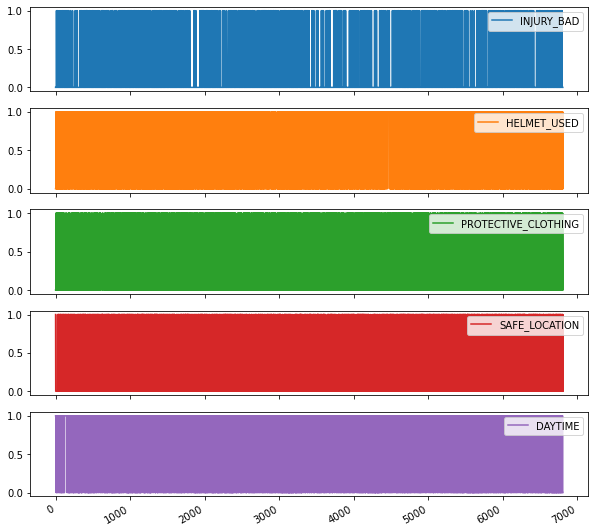

In [43]:
df_big.plot(subplots=True,figsize=(10,10))

In [44]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INJURY_BAD           6807 non-null   float64
 1   HELMET_USED          6807 non-null   float64
 2   age_bins             6807 non-null   object 
 3   SAFE_PEDAL_ACTION    6807 non-null   object 
 4   PROTECTIVE_CLOTHING  6807 non-null   float64
 5   SAFE_LOCATION        6807 non-null   float64
 6   WEATHER_CAT          6807 non-null   object 
 7   road_surf_bins       6807 non-null   object 
 8   DAYTIME              6807 non-null   int64  
 9   SPEED_RATING         6807 non-null   object 
 10  physical_bins        6807 non-null   object 
 11  hour_bins            6807 non-null   object 
 12  SEX                  6807 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 691.5+ KB


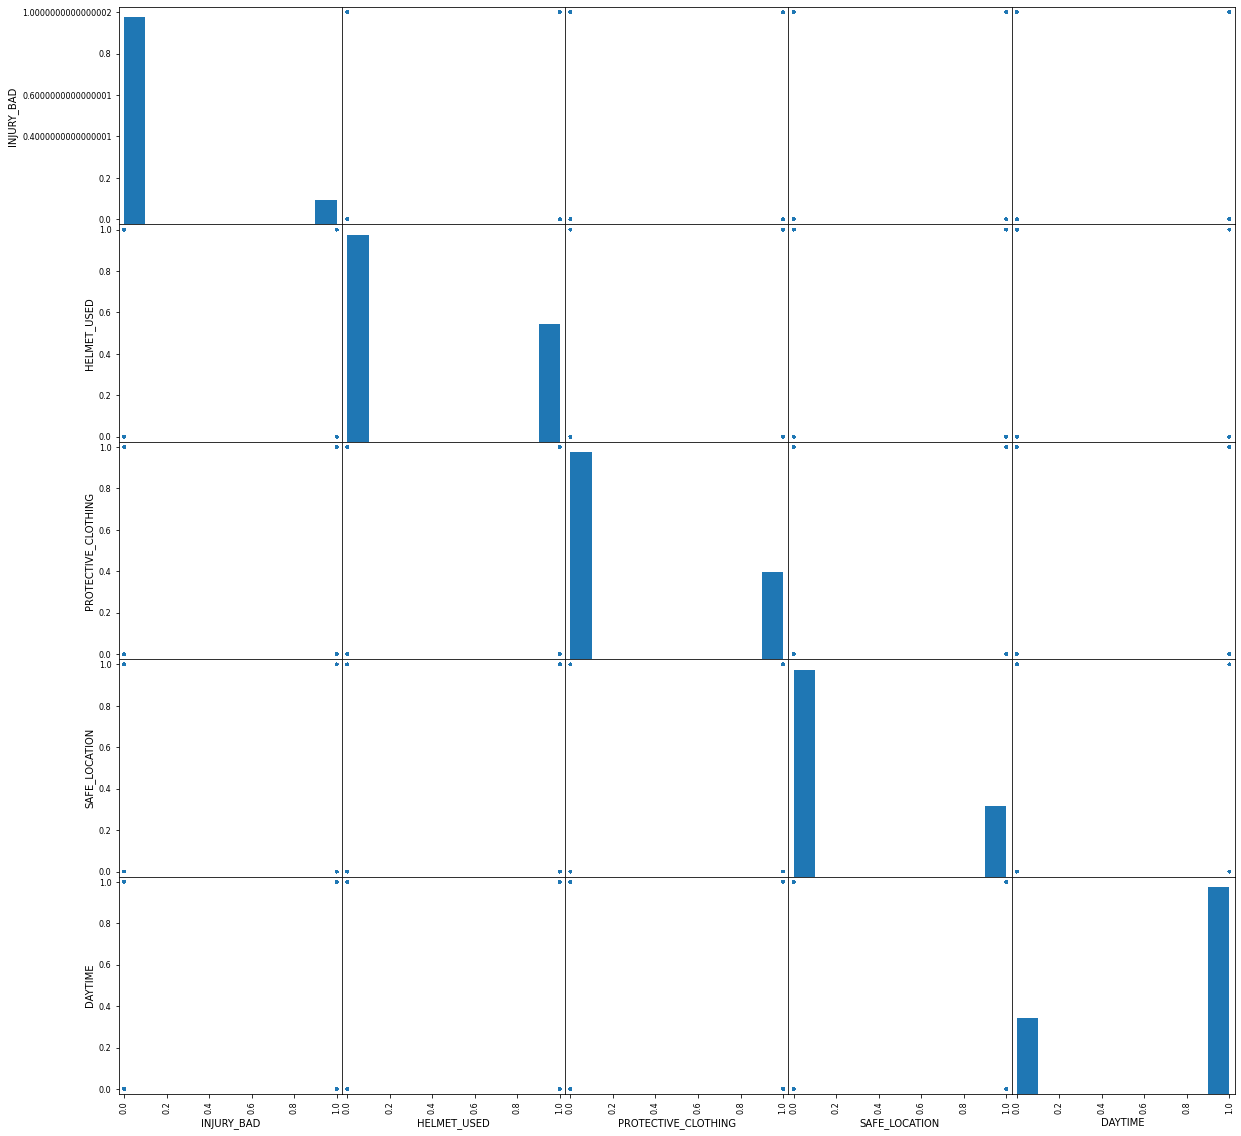

In [45]:
pd.plotting.scatter_matrix(df_big, alpha=0.5, figsize=(20,20))
plt.show()

<AxesSubplot:>

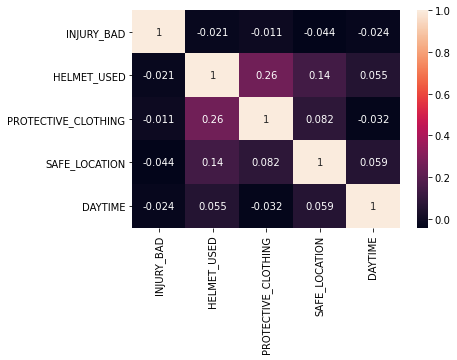

In [46]:
sns.heatmap(df_big.corr(), annot=True)

In [51]:
cat_columns = df_big[['age_bins', 'SAFE_PEDAL_ACTION', 'WEATHER_CAT', 'road_surf_bins','SPEED_RATING', 'physical_bins', 'hour_bins', 'SEX']]
cat_columns.head()


age_bins SAFE_PEDAL_ACTION    WEATHER_CAT road_surf_bins   SPEED_RATING  \
0  Middle-aged           Neutral  Clear Weather            Dry  Average Speed   
1        Adult           Neutral  Clear Weather            Dry  Average Speed   
2        Adult           Neutral  Clear Weather            Dry  Average Speed   
3        Adult              Safe  Clear Weather            Dry  Average Speed   
4      Elderly              Safe  Clear Weather            Dry  Average Speed   

  physical_bins  hour_bins SEX  
0        Normal  Afternoon   F  
1        Normal    Morning   M  
2         Other  Afternoon   M  
3        Normal  Afternoon   F  
4         Other  Afternoon   M

In [56]:
values_dict = {}
cat_cols = ['age_bins', 'SAFE_PEDAL_ACTION', 'WEATHER_CAT', 'road_surf_bins','SPEED_RATING', 'physical_bins', 'hour_bins']

for col in cat_cols:
    values_dict[col] = dict(df_big[col].value_counts(normalize=True))

# create a bubble plot using Plotly
fig = go.Figure()

for col, vals in values_dict.items():
    x_vals = [col] * len(vals)
    y_vals = list(vals.keys())
    size_vals = [val * 1000 for val in vals.values()]

    fig.add_trace(go.Scatter(
        x=x_vals, y=y_vals, mode='markers', marker_size=size_vals,
        name=col, hovertext=[f"{val:.2%}" for val in vals.values()]
    ))

fig.update_layout(
    xaxis_title='Column', yaxis_title='Value', title='Frequency of Values in Categorical Columns',
    hovermode='closest', showlegend=True,
)

fig.show()


In [75]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#
## Set the target variable
#target = 'INJURY_BAD'
#
## Set the columns to compare
#columns = df_big[['age_bins', 'SAFE_PEDAL_ACTION', 'WEATHER_CAT', 'road_surf_bins', 'SPEED_RATING', 'physical_bins', 'hour_bins']].mean()
#
## Create a figure with multiple subplots
#fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
#
## Loop through the columns and plot the barplots
#for i, col in enumerate(columns):
#    row = i // 4
#    col = i % 4
#    sns.catplot(x=columns[i], y=target, hue='INJURY_BAD', data=df_big, kind='bar', ax=axes[row][col])
#
## Set the title of the figure
#fig.suptitle('Differences between columns with different target variables')
#
## Adjust the spacing between the subplots
#plt.tight_layout()
#
## Show the figure
#plt.show()
#

## INJURY BAD

<AxesSubplot:xlabel='age_bins', ylabel='INJURY_BAD'>

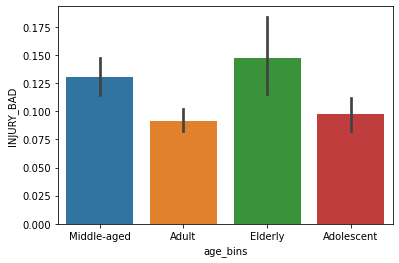

In [72]:
import seaborn as sns

#sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(data=df_big,x="age_bins", y="INJURY_BAD")

In [ ]:
sns.barplot(data=df_big,x="SAFE_PEDAL_ACTION", y="INJURY_BAD")

In [ ]:
sns.barplot(data=df_big,x="WEATHER_CAT", y="INJURY_BAD")

In [ ]:
sns.barplot(data=df_big,x="road_surf_bins", y="INJURY_BAD")

In [ ]:
sns.barplot(data=df_big,x="SPEED_RATING", y="INJURY_BAD")

In [ ]:
sns.barplot(data=df_big,x="physical_bins", y="INJURY_BAD")

In [ ]:
sns.barplot(data=df_big,x="hour_bins", y="INJURY_BAD")

## HELMET_USED

In [ ]:
sns.barplot(data=df_big,x="age_bins", y="HELMET_USED")

In [ ]:
sns.barplot(data=df_big,x="physical_bins", y="HELMET_USED")

## PROTECTIVE_CLOTHING

In [ ]:
sns.barplot(data=df_big,x="age_bins", y="PROTECTIVE_CLOTHING")

In [ ]:
sns.barplot(data=df_big,x="WEATHER_CAT", y="PROTECTIVE_CLOTHING")

In [ ]:
sns.barplot(data=df_big,x="physical_bins", y="PROTECTIVE_CLOTHING")

## SAFE_LOCATION

In [ ]:
sns.barplot(data=df_big,x="SAFE_PEDAL_ACTION", y="SAFE_LOCATION")


## DAYTIME

In [ ]:
#sns.barplot(data=df_big,x="age_bins", y="DAYTIME")

In [ ]:
#sns.barplot(data=df_big,x="SAFE_PEDAL_ACTION", y="DAYTIME")

In [ ]:
#sns.barplot(data=df_big,x="WEATHER_CAT", y="DAYTIME")

In [ ]:
#sns.barplot(data=df_big,x="road_surf_bins", y="DAYTIME")

In [ ]:
#sns.barplot(data=df_big,x="SPEED_RATING", y="DAYTIME")

In [ ]:
#sns.barplot(data=df_big,x="physical_bins", y="DAYTIME")

In [ ]:
#sns.barplot(data=df_big,x="hour_bins", y="DAYTIME")

## FINAL PLOTS

In [182]:
from matplotlib import rcParams
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=2)
sns.set_style(style='white') 

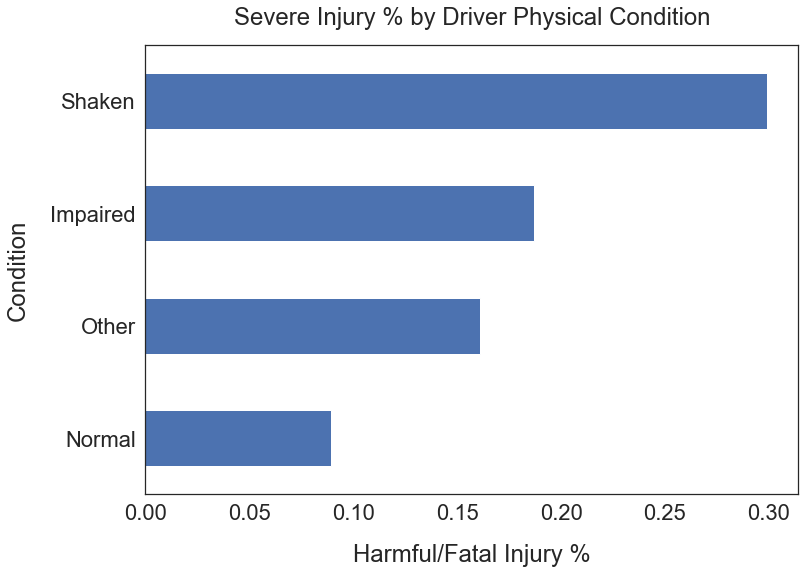

In [183]:
ax = df_big.groupby(by=['physical_bins'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

ax.set_xlabel('Harmful/Fatal Injury %',labelpad=20)
ax.set_ylabel('Condition',labelpad=20)
ax.set_title('Severe Injury % by Driver Physical Condition',pad=20)
ax.grid(False)

plt.show()

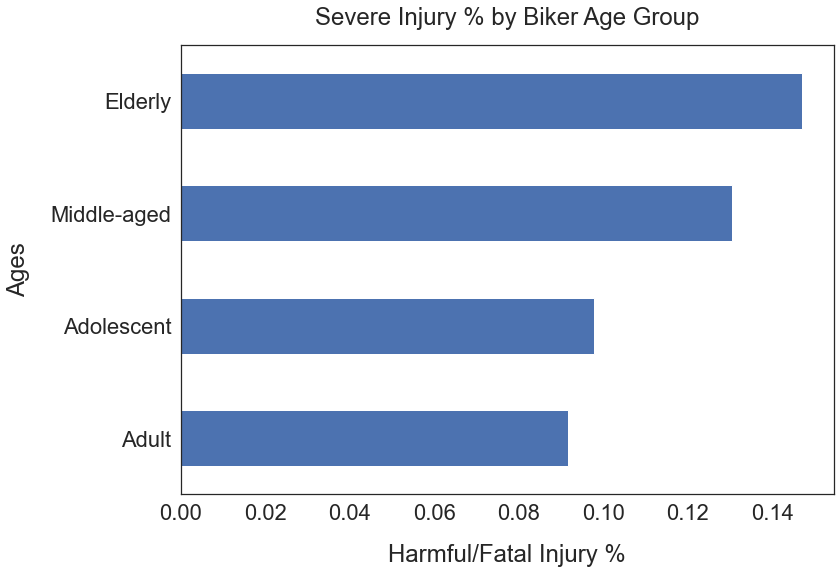

In [184]:
ax = df_big.groupby(by=['age_bins'])['INJURY_BAD'].mean().sort_values().plot(kind='barh')

ax.set_xlabel('Harmful/Fatal Injury %',labelpad=20)
ax.set_ylabel('Ages',labelpad=20)
ax.set_title('Severe Injury % by Biker Age Group',pad=20)
ax.grid(False)

plt.show()



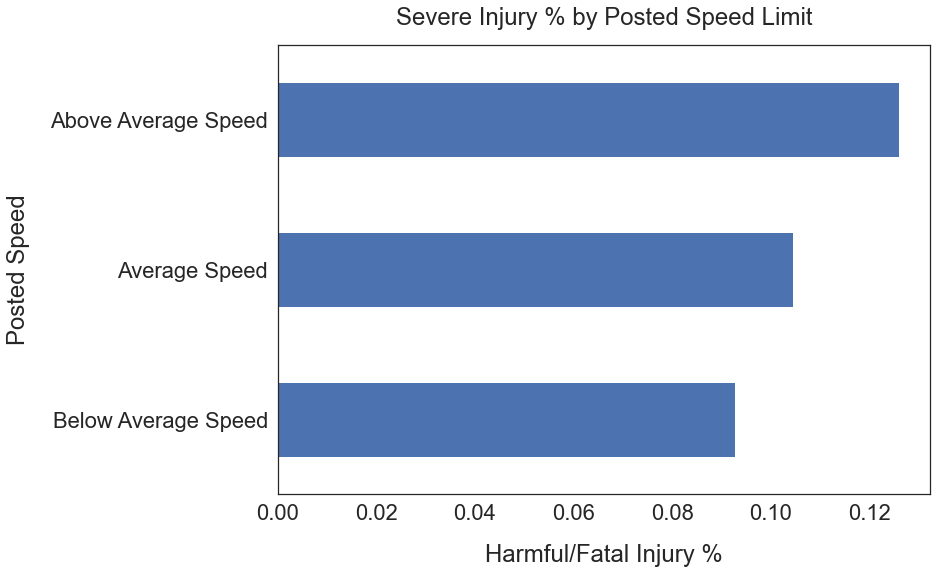

In [185]:
ax = df_big.groupby(by=['SPEED_RATING'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

ax.set_xlabel('Harmful/Fatal Injury %',labelpad=20)
ax.set_ylabel('Posted Speed',labelpad=20)
ax.set_title('Severe Injury % by Posted Speed Limit',pad=20)
ax.grid(False)

plt.show()


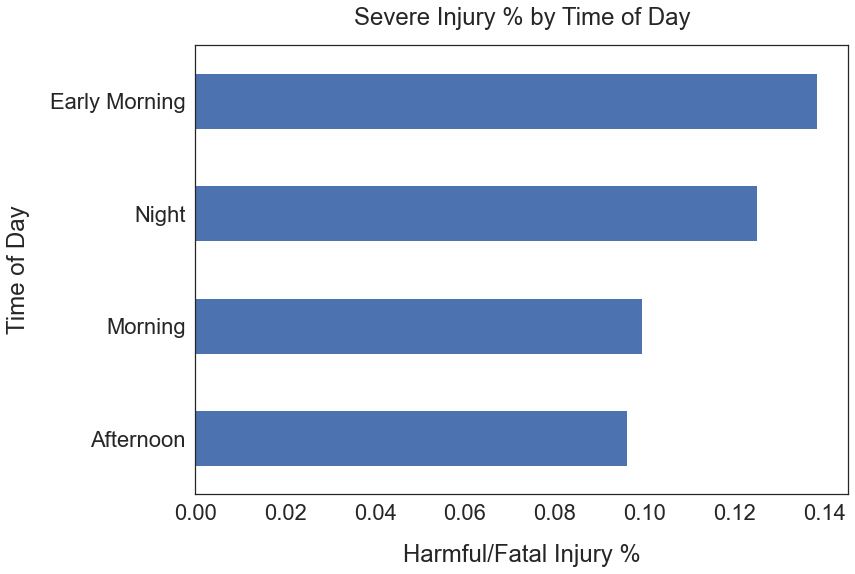

In [186]:
ax = df_big.groupby(by=['hour_bins'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

ax.set_xlabel('Harmful/Fatal Injury %',labelpad=20)
ax.set_ylabel('Time of Day',labelpad=20)
ax.set_title('Severe Injury % by Time of Day',pad=20)
ax.grid(False)

plt.show()



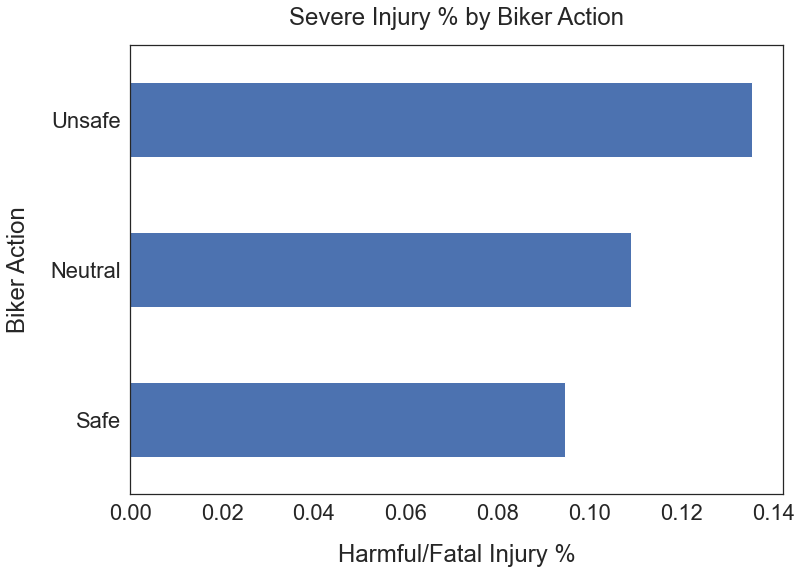

In [187]:
ax = df_big.groupby(by=['SAFE_PEDAL_ACTION'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

ax.set_title('Severe Injury % by Biker Action',pad=20)
ax.set_xlabel('Harmful/Fatal Injury %',labelpad=20)
ax.set_ylabel('Biker Action',labelpad=20)
ax.grid(False)

plt.show()


In [188]:
#sns.pairplot(df_big, hue="INJURY_BAD", height=3)
